# NAMA    : AGUNG REYNALDI AVIZENA <BR>NIM     : 1103204044 <BR>TUGAS KE-6

## - IMPORT LIBRARY

In [46]:
# import library
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [22]:
# Mengabaikan semua peringatan
warnings.filterwarnings('ignore')

## - MEMUAT DATASET

In [13]:
# load dataset
dataset = "Mall_Customers.csv"
df = pd.read_csv(dataset)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## - MENGGANTI NAMA KOLOM DAN DROP KOLOM YANG TIDAK DIPERLUKAN

In [15]:
# Mengubah nama kolom
df = df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})

df.head()

,CustomerID,Genre,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
# Menghapus kolom CustomerID dan Genre
df = df.drop(['CustomerID', 'Genre'], axis=1)

df.head()

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [57]:
X = df[['Age','Annual Income', 'Spending Score']]

## - ELBOW METHODS
Tujuan dari Elbow Method adalah untuk mencari titik di grafik di mana penurunan inertia mulai melambat, membentuk "siku" atau "siku" seperti bentuk yang menyerupai siku tangan manusia. Hasil dari visualisasi ini nantinya akan menunjukkan inertia pada sumbu y dan jumlah cluster (k) pada sumbu x..

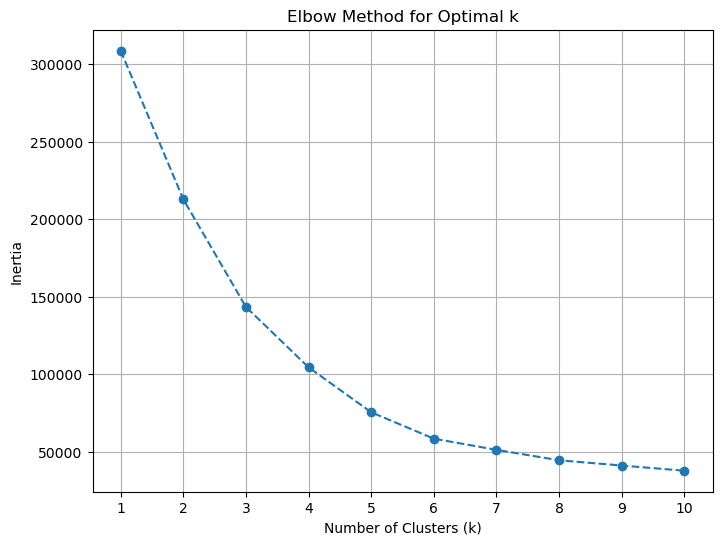

In [50]:
# Nilai K maksimuim
max_k = 11

# Menyimpan inertia (sum of squared distances to the closest centroid) untuk setiap nilai k
inertia = []
for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Memvisualisasikan Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

## - K MEANS CLUSTERING, K = 5
melakukan proses clustering menggunakan algoritma K-Means dengan 5 dan 6 cluster. Setelah menginisialisasi model, data pada atribut Age, Annual Income, dan Spending Score di-cluster. Koordinat sentroid dari setiap cluster diambil dan disimpan dalam DataFrame terpisah. Hasil clustering kemudian divisualisasikan dalam scatter plot, di mana setiap titik data dari cluster tertentu ditampilkan dengan warna yang berbeda.

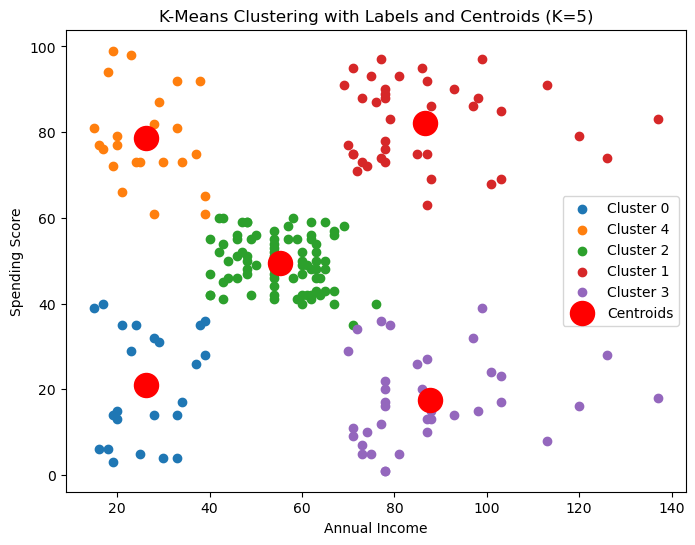

In [51]:
# Menginisialisasi model K-Means dengan K=5
kmeans = KMeans(n_clusters=5, random_state=0)

# Melakukan clustering
df['Label'] = kmeans.fit_predict(X)

# Mendapatkan koordinat sentroid dari setiap cluster
centroids = kmeans.cluster_centers_

# Menambahkan sentroid ke dalam DataFrame
df_centroids = pd.DataFrame(centroids, columns=['Centroid Age', 'Centroid Annual Income', 'Centroid Spending Score'])

# Visualisasi hasil clustering berdasarkan label dengan sentroid
plt.figure(figsize=(8, 6))
for label in df['Label'].unique():
    cluster_data = df[df['Label'] == label]
    plt.scatter(cluster_data['Annual Income'], cluster_data['Spending Score'], label=f'Cluster {label}')

# Menambahkan sentroid ke dalam plot
plt.scatter(df_centroids['Centroid Annual Income'], df_centroids['Centroid Spending Score'], color='red', marker='o', s=300, label='Centroids')

plt.title('K-Means Clustering with Labels and Centroids (K=5)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

## - K MEANS CLUSTERING, K = 6

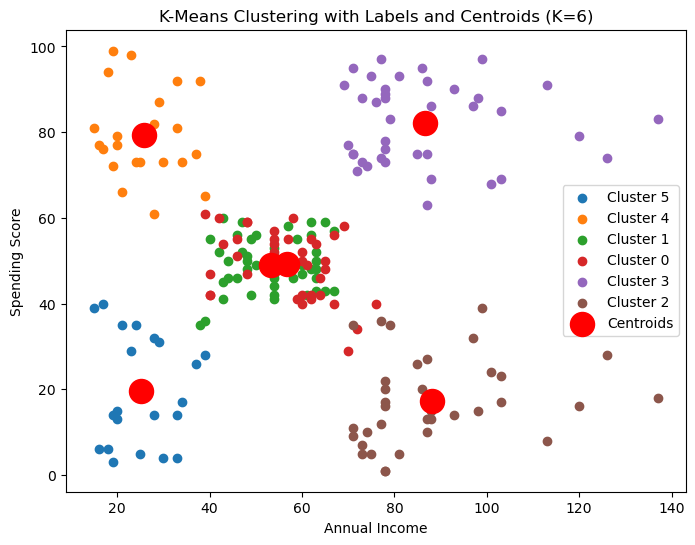

In [52]:
# Menginisialisasi model K-Means dengan K=6
kmeans = KMeans(n_clusters=6, random_state=0)

# Melakukan clustering
df['Label'] = kmeans.fit_predict(X)

# Mendapatkan koordinat sentroid dari setiap cluster
centroids = kmeans.cluster_centers_

# Menambahkan sentroid ke dalam DataFrame
df_centroids = pd.DataFrame(centroids, columns=['Centroid Age', 'Centroid Annual Income', 'Centroid Spending Score'])

# Visualisasi hasil clustering berdasarkan label dengan sentroid
plt.figure(figsize=(8, 6))
for label in df['Label'].unique():
    cluster_data = df[df['Label'] == label]
    plt.scatter(cluster_data['Annual Income'], cluster_data['Spending Score'], label=f'Cluster {label}')

# Menambahkan sentroid ke dalam plot
plt.scatter(df_centroids['Centroid Annual Income'], df_centroids['Centroid Spending Score'], color='red', marker='o', s=300, label='Centroids')

plt.title('K-Means Clustering with Labels and Centroids (K=6)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

## - SILHOUETTE SCORE
menggunakan loop untuk melakukan clustering dengan menggunakan algoritma K-Means dengan jumlah cluster (k) yang berbeda, mulai dari k=2 hingga nilai maksimum yang ditentukan yaitu 10. Untuk setiap nilai k, model K-Means diinisialisasi dan data di-cluster. Selanjutnya, Silhouette Score dihitung untuk mengukur seberapa baik cluster tersebut terpisah dan berdekatan. 
Silhouette Score memberikan indikasi seberapa baik objek berada di dalam cluster mereka sendiri dibandingkan dengan cluster tetangga terdekat. 

Hasilnya untuk cluster yang paling baik ada pada k = 6, yang memiliki silhouette score lebih tinggi dari lainnya


In [59]:
for k in range(2, max_k):
    # Inisialisasi model K-Means
    kmeans = KMeans(n_clusters=k, random_state=0)

    # Melakukan clustering
    df['Label'] = kmeans.fit_predict(X)

    # Menghitung Silhouette Score
    silhouette_avg = silhouette_score(X, df['Label'])
    
    print(f"For k={k}, the average Silhouette Score is {silhouette_avg: .2f}")

For k=2, the average Silhouette Score is  0.29
For k=3, the average Silhouette Score is  0.38
For k=4, the average Silhouette Score is  0.41
For k=5, the average Silhouette Score is  0.44
For k=6, the average Silhouette Score is  0.45
For k=7, the average Silhouette Score is  0.44
For k=8, the average Silhouette Score is  0.43
For k=9, the average Silhouette Score is  0.40
For k=10, the average Silhouette Score is  0.38


## - DAVIS-COULDIN INDEX (DBI) SCORES

Davies-Bouldin Index dihitung untuk mengukur seberapa baik cluster tersebut terpisah dan berdekatan berdasarkan pada perbedaan antara kelompok dan pusat cluster terdekat. Semakin rendah nilai Davies-Bouldin Index, semakin baik cluster-cluster tersebut terpisah dan berdekatan.

Hasilnya sama pada silhouette score cluster paling bagus berada pada k = 6, yang memiliki nilai DBI paling kecil

In [54]:
for k in range(2, max_k):
    # Inisialisasi model K-Means
    kmeans = KMeans(n_clusters=k, random_state=0)

    # Melakukan clustering
    df['Label'] = kmeans.fit_predict(X)

    # Menghitung Davies-Bouldin Index
    dbi_score = davies_bouldin_score(X, df['Label'])
    
    print(f"For k={k}, the Davies-Bouldin Index is {dbi_score:.2f}")

For k=2, the Davies-Bouldin Index is 1.36
For k=3, the Davies-Bouldin Index is 0.87
For k=4, the Davies-Bouldin Index is 0.89
For k=5, the Davies-Bouldin Index is 0.82
For k=6, the Davies-Bouldin Index is 0.75
For k=7, the Davies-Bouldin Index is 0.79
For k=8, the Davies-Bouldin Index is 0.86
For k=9, the Davies-Bouldin Index is 0.91
For k=10, the Davies-Bouldin Index is 0.96


## - CALINSKI-HARABASZ INDEX (CHI) SCORES
Semakin tinggi nilai Calinski-Harabasz Index, semakin baik cluster-cluster tersebut terpisah. 

Hasilnya sama dengan yang sebelumnya yaitu cluster terbaik ada pada k = 6

In [55]:
for k in range(2, max_k):
    # Inisialisasi model K-Means
    kmeans = KMeans(n_clusters=k, random_state=0)

    # Melakukan clustering
    df['Label'] = kmeans.fit_predict(X)

    # Menghitung Calinski-Harabasz Index
    chi_score = calinski_harabasz_score(X, df['Label'])
    
    print(f"For k={k}, the Calinski-Harabasz Index is {chi_score:.2f}")

For k=2, the Calinski-Harabasz Index is 89.28
For k=3, the Calinski-Harabasz Index is 113.71
For k=4, the Calinski-Harabasz Index is 127.98
For k=5, the Calinski-Harabasz Index is 151.04
For k=6, the Calinski-Harabasz Index is 166.72
For k=7, the Calinski-Harabasz Index is 162.29
For k=8, the Calinski-Harabasz Index is 163.58
For k=9, the Calinski-Harabasz Index is 156.16
For k=10, the Calinski-Harabasz Index is 152.26
